# Project 2: Airline On-Time Performance Data
Airline on-time performance data from 1987 to 2012

In this project, we will be working with the Airline On-Time Performance dataset, which contains flight data from 1987 to 2012. The dataset includes various attributes such as flight delays, cancellations, and other performance metrics.

The goal is to analyze the data to identify trends, patterns, and insights related to flight performance over the years.

The link to the dataset can be access here: https://tinyurl.com/bdejna9e

this data consists of 3 main data structures:
1. **Flights**: Contains information about individual flights, including flight numbers, dates, departure and arrival times, delays, cancellations, and other performance metrics.
2. **Airports**: Contains information about airports, including their names, locations, and codes.
3. **Airlines**: Contains information about airlines, including their names and codes.

The relationships between these data structures are as follows:

**1987 - 2008**
| **Variable** | **Description** |
|---:|---:|
| Year | Year of flight |
| Month | Month of the flight (1 = Jan, ..., 12 = Dec) |
| DayofMonth | Day of the Month (1 to 31) |
| DayofWeek | Day of the week (1 = Monday, ..., 7 = Sunday) |
| DepTime | Actual Departure Time in 24hrs format |
| CRSDepTime | Scheduled Departure Time in 24hrs format |
| ArrTime | Actual Arrival Time in 24hrs format |
| CRSArrTime | Scheduled Arrival Time in 24hrs format |
| UniqueCarrier | Carrier Code | 
| FlightNum | Flight Number |
| TailNum | Plane's tail number |
| ActualEplapsedTime | Actual elapsed time (in minutes) |
| CRSElapsedTime | Estimated elapsed time (in minutes) |
| AirTime | Flight time (in minutes) |
| ArrDelay | Arrival Delay in minutes (ArrTime - CRSArrTime) | 
| DepDelay | Departure Delay in minutes (DepTime - CRSDepTime) |
| Origin | Origin IATA airport code |
| Dest | Destination IATA airport code|
| Distance | Distance in KM|
| TaxiIn | Wheels down and arrival at the destination airport gate (in minutes) |
| Cancelled | Was the flight cancelled? (1 = yes, 0 = no) |
| CancellationCode | Reasons for cancellation (A = carrier, B =  weather, C = NAS, D = security) |
| Diverted | 1 = yes, 0 = no |
| CarrierDelay | Delay (in minutes) caused by carrier |
| WeatherDelay | Delay (in minutes) caused by weather|
| NASDelay | National Air Security (NAS) delay |
| SecurityDelay | Delay (in minutes) caused by security |
| LateAircraftDelay | Delay (in minutes) caused by late aircraft |

**airports**
| **Variable** | **Description** |
| ---: | ---: | 
| iata | Airport code |
| airport | Airport Name  |
| city | Airport ity |
| state | Airport state |
| country | Airport country |
| lat | Airport latitude |
| long | Airport longitude | 

**carriers**
| **Variable** | **Description** |
| ---: | ---: | 
| Code | Carrier code |
| Description | Carrier name |

**plane-data**
| **Variable** | **Description** |
| ---: | ---: | 
| tailnum | Aircraft tial number |
| type | Usage type | 
| manufacturer | Manufacturer company | 
| issue_date | Date start operating |
| model | Aircraft model |
| status | Status |
| aircraft_type | Aircraft type |
| engine_type | Engine type |
| year | Manufacture year |

2006['TailNum'] = plane-data['tailnum']

2006[['Dest', 'Origin']] = airports['iata']

2006['UniqueCarrier'] = carriers['Code']

<h1 style = 'font-weight:bold'> Import Data to Hadoop Distributed File System (HDFS) and Apache Hive and  </h1>

1. All data are downloaded from the Kaggle website
2. All .csv files are being uploaded into HDFS using upload features in the files view in the Ambari and make sure that all .csv file is in their own folder (1 folder can only contain 1 .csv file)
   
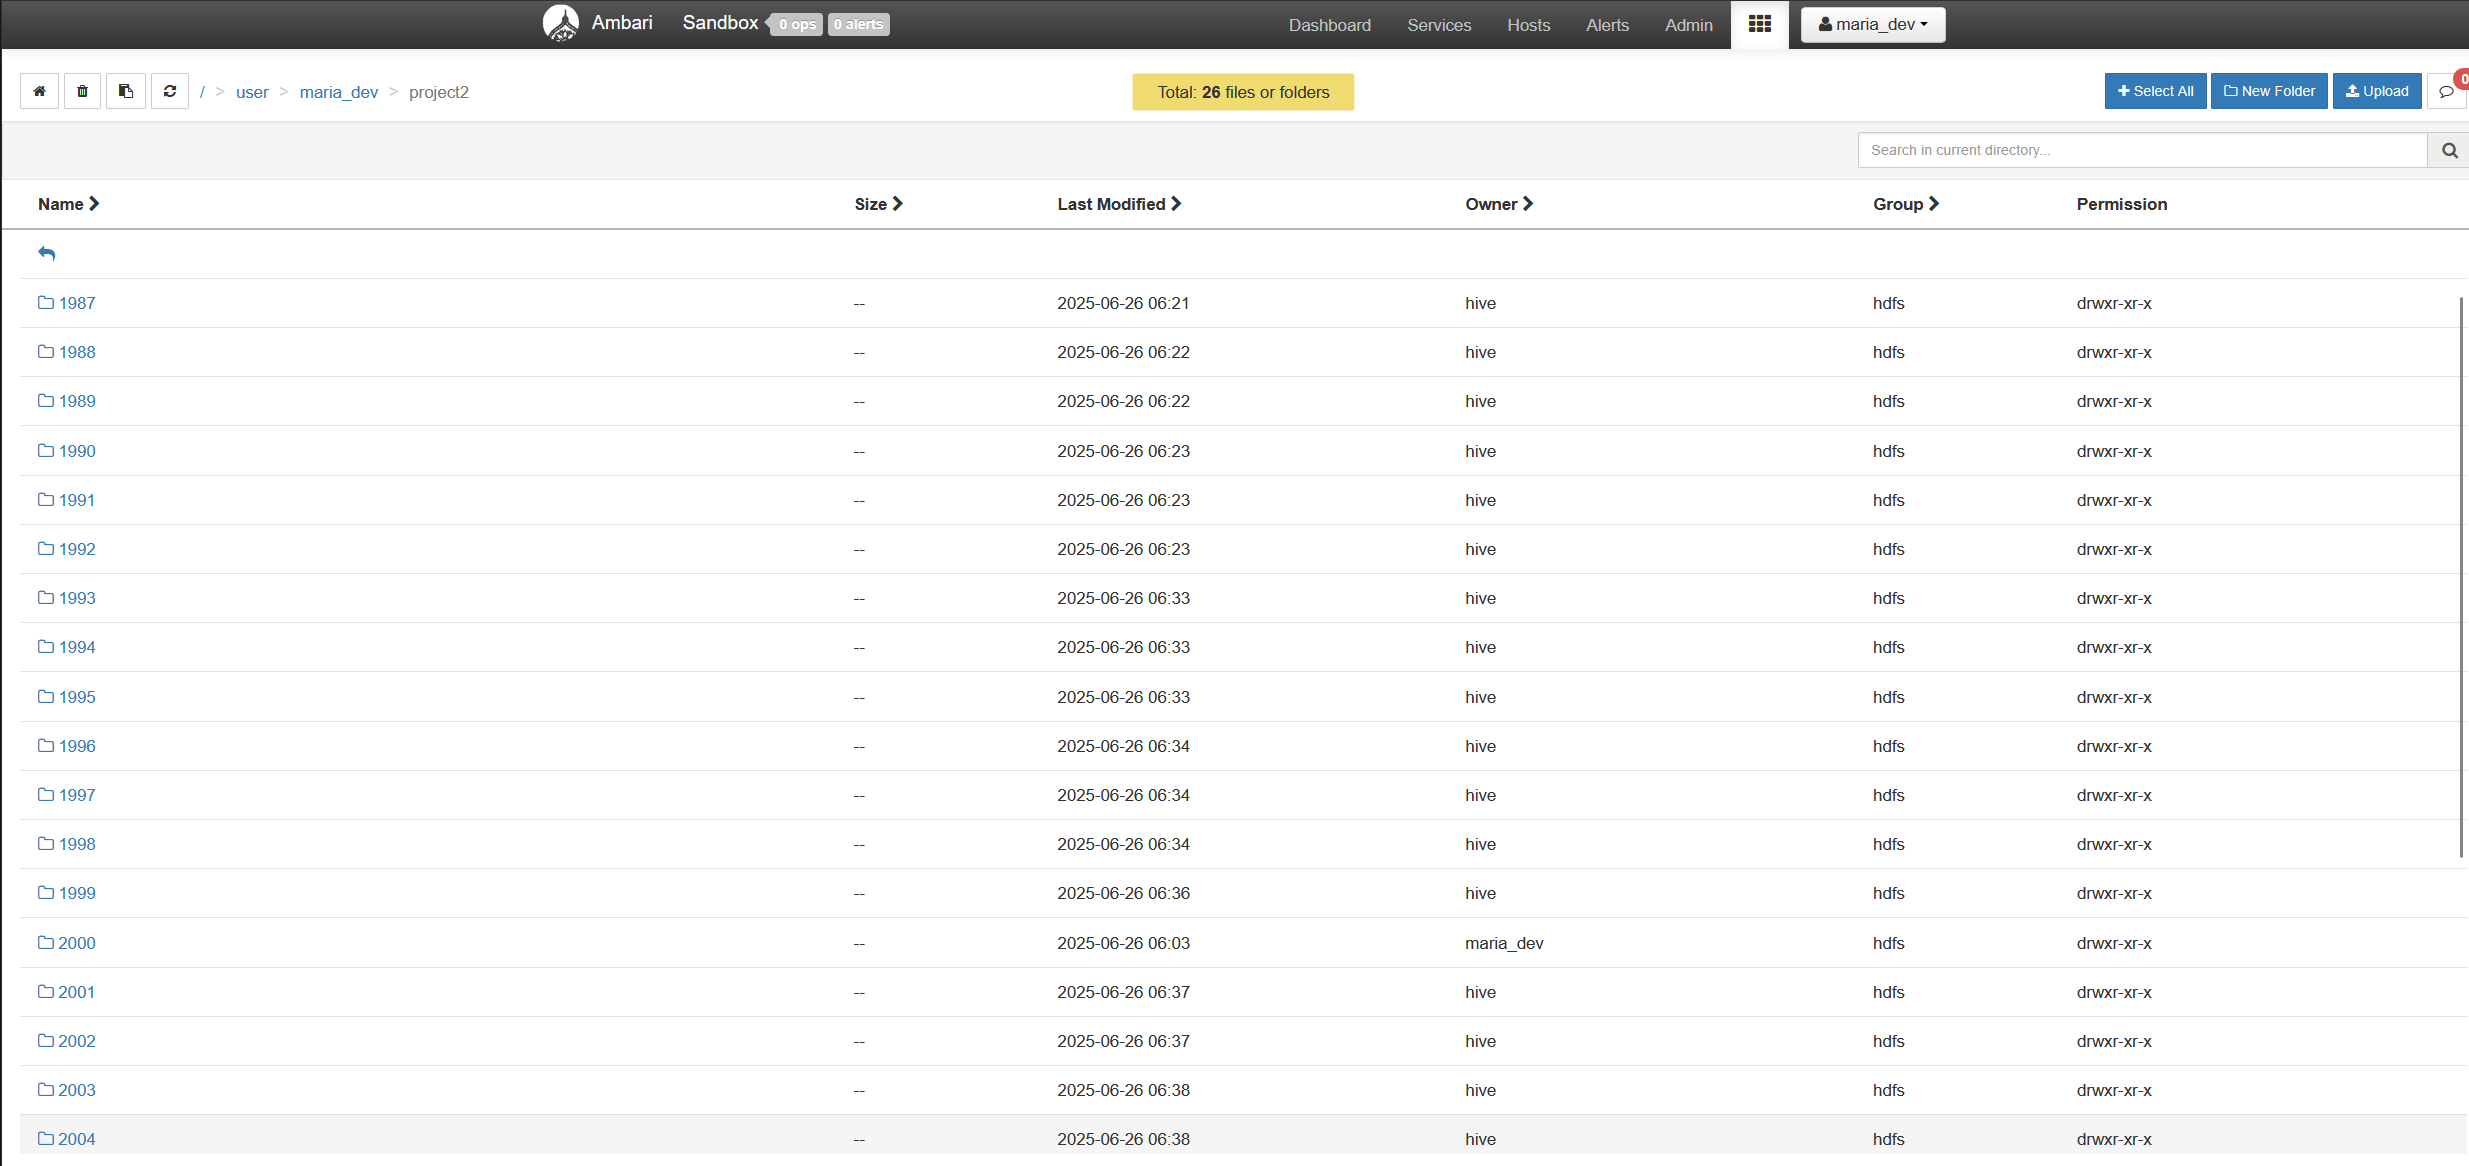

4. Run below code to import data from HDFS into Apache Hive

Note: To ensure reproducibility, make sure all directory are update to match the directory in your system.

In [1]:
# Import necessary libraries
from pyhive import hive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
from sqlalchemy.engine import create_engine
import pandas as pd

engine = create_engine('hive://maria_dev@localhost:10000/default')

In [ ]:
# establish a connection to hive
conn = hive.Connection(host='localhost',
                       port=10000,
                       username='maria_dev')

# create a cursor object using the connection
cursor = conn.cursor()

# define a function to execute Hive queries and print results
def hive_query(query):
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)

Note: use `hive_query` function to execute Hive queries and print results and use `cursor.execute` to run Hive queries without printing results.

In [3]:
# Create a database
cursor.execute("CREATE DATABASE IF NOT EXISTS project2")

# View all databases to make sure the database was created
hive_query("SHOW DATABASES")

('adult',)
('credit',)
('default',)
('foodmart',)
('project',)
('project2',)
('test',)
('worldbank',)


In [4]:
# import 1987 - 2008 airline data from HDFS (in csv file) to Hive
for year in range(1987, 2009):
    location = f"/user/maria_dev/project2/{year}"
    table_name = f"project2.airline_{year}"
# Create external table pointing to the CSV
    cursor.execute(f"""
    CREATE EXTERNAL TABLE IF NOT EXISTS {table_name} (
        Year INT,
        Month INT,
        DayofMonth INT,
        DayOfWeek INT,
        DepTime INT,
        CRSDepTime INT,
        ArrTime INT,
        CRSArrTime INT,
        UniqueCarrier STRING,
        FlightNum INT,
        TailNum STRING,
        ActualElapsedTime INT,
        CRSElapsedTime INT,
        AirTime INT,
        ArrDelay INT,
        DepDelay INT,
        Origin STRING,
        Dest STRING,
        Distance INT,
        TaxiIn INT,
        TaxiOut INT,
        Cancelled INT,
        CancellationCode STRING,
        Diverted INT,
        CarrierDelay INT,
        WeatherDelay INT,
        NASDelay INT,
        SecurityDelay INT,
        LateAircraftDelay INT
    )
    ROW FORMAT DELIMITED
    FIELDS TERMINATED BY ','
    STORED AS TEXTFILE
    LOCATION '{location}'
    TBLPROPERTIES ("skip.header.line.count"="1")
    """)


In [5]:
# import airports data from HDFS (in csv file) to Hive
cursor.execute("""
               CREATE TABLE IF NOT EXISTS project2.airports (
                iata STRING,
                airport STRING,
                city STRING,
                state STRING,
                country STRING,
                lat FLOAT,
                long FLOAT
               )
                ROW FORMAT DELIMITED
                FIELDS TERMINATED BY ','
                STORED AS TEXTFILE
                LOCATION '/user/maria_dev/project2/airports'
                TBLPROPERTIES ("skip.header.line.count"="1")
                """)


In [6]:
# import carriers data from HDFS (in csv file) to Hive
cursor.execute("""
               CREATE TABLE IF NOT EXISTS project2.carriers (
                Code STRING,
                Description STRING
               )
                ROW FORMAT DELIMITED
                FIELDS TERMINATED BY ','
                STORED AS TEXTFILE
                LOCATION '/user/maria_dev/project2/carriers'
                TBLPROPERTIES ("skip.header.line.count"="1")
""")


In [7]:
# import plane data from HDFS (in csv file) to Hive
cursor.execute("""
               CREATE TABLE IF NOT EXISTS project2.plane_data (
                tailnum STRING,
                type STRING,
                manufacturer STRING,
                issue_date STRING,
                model STRING,
                status STRING,
                serial_number STRING,
                engine_type STRING,
                year INT
               )
                ROW FORMAT DELIMITED
                FIELDS TERMINATED BY ','
                STORED AS TEXTFILE
                LOCATION '/user/maria_dev/project2/plane_data'
                TBLPROPERTIES ("skip.header.line.count"="1")
""")


In [ ]:
# combine all airline data from 1987 to 2008 into a single table airline_all
years = range(1987, 2009)  
union_query_parts = [f"SELECT * FROM project2.airline_{year}" for year in years]
union_all_query = " UNION ALL\n".join(union_query_parts)

cursor.execute(f"""
CREATE TABLE IF NOT EXISTS project2.airline_all
AS
{union_all_query}
""")

<h1 style = 'font-weight:bold'> Selecting Year of Interest </h1>

In [9]:
# define columns to check for null values
columns = [
    "Year", "Month", "DayofMonth", "DayOfWeek", "DepTime", "CRSDepTime", "ArrTime", "CRSArrTime",
    "UniqueCarrier", "FlightNum", "TailNum", "ActualElapsedTime", "CRSElapsedTime", "AirTime",
    "ArrDelay", "DepDelay", "Origin", "Dest", "Distance", "TaxiIn", "TaxiOut", "Cancelled",
    "CancellationCode", "Diverted", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"
]

results = []

# loop through each year from 1987 to 2008 and check for null values in the specified columns
for year in range(1987, 2009):
    table = f"project2.airline_{year}"
    print(f"Processing {table}")

    null_checks = " +\n    ".join([
        f"IF({col} IS NULL OR {col} = '', 1, 0)" if col in ['TailNum', 'UniqueCarrier', 'Origin', 'Dest', 'CancellationCode']
        else f"IF({col} IS NULL, 1, 0)"
        for col in columns
    ])

    query = f"""
        SELECT
            {year} AS year,
            COUNT(*) AS total_rows,
            SUM(
                {null_checks}
            ) AS total_missing_values
        FROM {table}
    """

    cursor.execute(query)
    row = cursor.fetchone()
    results.append(row)

data = pd.DataFrame(results, columns=["year", "total_rows", "total_missing_values"])

Processing project2.airline_1987
Processing project2.airline_1988
Processing project2.airline_1989
Processing project2.airline_1990
Processing project2.airline_1991
Processing project2.airline_1992
Processing project2.airline_1993
Processing project2.airline_1994
Processing project2.airline_1995
Processing project2.airline_1996
Processing project2.airline_1997
Processing project2.airline_1998
Processing project2.airline_1999
Processing project2.airline_2000
Processing project2.airline_2001
Processing project2.airline_2002
Processing project2.airline_2003
Processing project2.airline_2004
Processing project2.airline_2005
Processing project2.airline_2006
Processing project2.airline_2007
Processing project2.airline_2008


In [77]:
# Calculate the missing ratio and sort the data
data['missing_ratio'] = (data['total_missing_values'] / data['total_rows'])
data['missing_ratio'] = data['missing_ratio'].round(2)
data['year'] = data['year'].astype(str)  # Convert year to string for better plotting
data = data.sort_values(by='missing_ratio', ascending=True)
data

,year,total_rows,total_missing_values,missing_ratio
19,2006,7141922,7816340,1.09
18,2005,7140596,7865357,1.10
17,2004,7129270,7823311,1.10
20,2007,7453215,8326686,1.12
16,2003,6488540,17807091,2.74
21,2008,2389217,11934610,5.00
15,2002,5271359,26811122,5.09
8,1995,5327435,27187761,5.10
10,1997,5411843,27698966,5.12
9,1996,5351983,27592261,5.16


C:\Users\user\AppData\Local\Temp\ipykernel_19392\795302561.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='year', y='missing_ratio', data=data, palette='pastel')


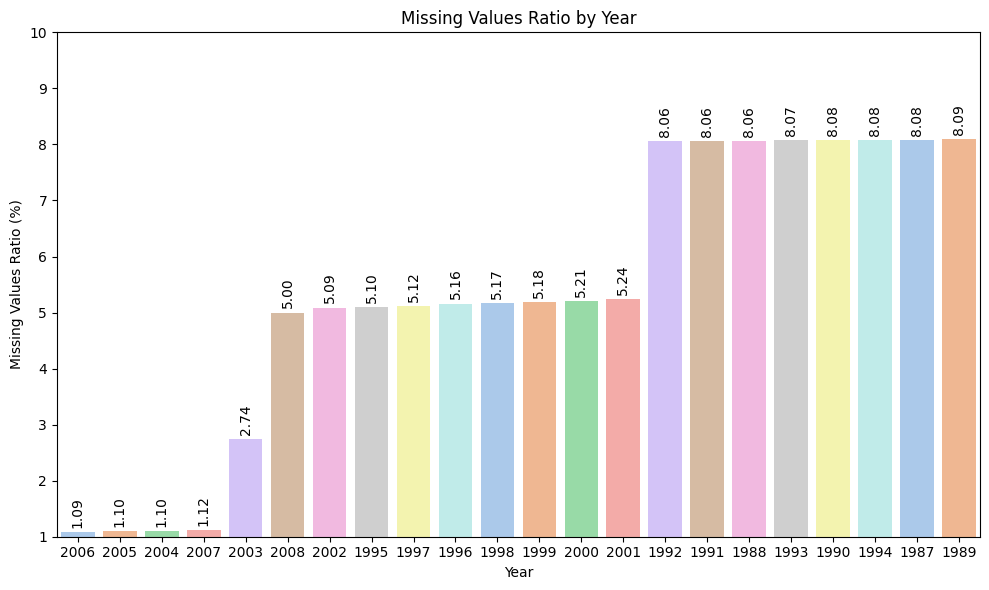

In [78]:
# plot the top missing values ratio by year
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.barplot(x='year', y='missing_ratio', data=data, palette='pastel')

for container in ax.containers:
    ax.bar_label(container, 
                 labels=[f'{v:.2f}' for v in container.datavalues], 
                 padding=3,
                 rotation=90)
    
plt.title("Missing Values Ratio by Year")
plt.xlabel("Year")
plt.ylabel("Missing Values Ratio (%)")
plt.ylim(1, 10)
plt.tight_layout()
plt.show();

The year **2006** with 7,141,922 observation was selected for further analysis due to its exceptionally **low ratio of missing values**, as shown in the "Missing Values Ratio by Year" plot. With a missing data ratio of only **1.09**, 2006 stands out as one of the **most complete and reliable datasets available**. Choosing a year with minimal missing data ensures more accurate and meaningful insights during analysis, reduces the need for extensive data cleaning or imputation, and minimizes the risk of bias or distortion in the findings. This makes 2006 a strong candidate for conducting a robust and trustworthy examination of airline performance patterns.

<h1 style = 'font-weight:bold'> 1. Delay patterns </h1>

<h2> 1.1 What times of the day have the lowest average delays </h2>

In [40]:
# query data of average departure delay by time of day
query1 = """
    SELECT
        CASE
            WHEN crsdeptime BETWEEN 500 AND 1159 THEN 'Morning'
            WHEN crsdeptime BETWEEN 1200 AND 1659 THEN 'Afternoon'
            WHEN crsdeptime BETWEEN 1700 AND 2059 THEN 'Evening'
            ELSE 'Night'
        END AS time_of_day,
        AVG(depdelay) AS avg_depdelay
    FROM project2.airline_2006
    WHERE depdelay IS NOT NULL
    AND crsdeptime IS NOT NULL
    GROUP BY
        CASE
            WHEN crsdeptime BETWEEN 500 AND 1159 THEN 'Morning'
            WHEN crsdeptime BETWEEN 1200 AND 1659 THEN 'Afternoon'
            WHEN crsdeptime BETWEEN 1700 AND 2059 THEN 'Evening'
            ELSE 'Night'
        END
    ORDER BY avg_depdelay
"""

df = pd.read_sql(query1, engine)
df['avg_depdelay'] = df['avg_depdelay'].round(2)
df

,time_of_day,avg_depdelay
0,Morning,4.49
1,Afternoon,11.80
2,Night,13.30
3,Evening,17.02


C:\Users\user\AppData\Local\Temp\ipykernel_19392\2152215326.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='time_of_day', y='avg_depdelay', data=df, palette='pastel', order=order)


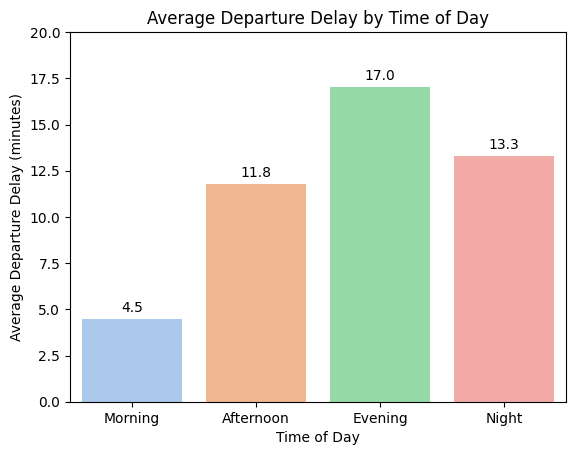

In [114]:
# visualize the average departure delay by time of day
order = ['Morning', 'Afternoon', 'Evening', 'Night']
ax = sns.barplot(x='time_of_day', y='avg_depdelay', data=df, palette='pastel', order=order)
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v:.1f}' for v in container.datavalues], padding=3)
plt.title("Average Departure Delay by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Departure Delay (minutes)")
plt.ylim(0, 20)
plt.show();

Based on the analysis of the 2006 airline dataset, **morning flights (5:00 AM to 11:59 AM)** have the **lowest average departure delay**, with an average delay of only **4.5 minutes**. This is significantly lower compared to the afternoon (11.8 minutes), evening (17.0 minutes), and night (13.3 minutes) periods. The findings suggest that scheduling flights in the morning can greatly reduce the likelihood of departure delays. This may be due to less congestion in the early hours of the day and the cumulative effect of delays not yet building up.

<h2> 1.2 Which days of the week show better on-time performance? </h2>

In [41]:
query = """
    SELECT 
        dayofweek,
        COUNT(*) AS total_flights,
        SUM(CASE WHEN depdelay <= 0 THEN 1 ELSE 0 END) AS on_time_flights,
        ROUND(100.0 * SUM(CASE WHEN depdelay <= 0 THEN 1 ELSE 0 END) / COUNT(*), 2) AS on_time_percent
    FROM project2.airline_2006
    WHERE depdelay IS NOT NULL AND dayofweek IS NOT NULL
    GROUP BY dayofweek
    ORDER BY on_time_percent DESC
"""

df2 = pd.read_sql(query, engine)
df2

,dayofweek,total_flights,on_time_flights,on_time_percent
0,2,1014389,653861,64.46
1,3,1024673,640678,62.53
2,6,888200,546647,61.55
3,1,1030449,613288,59.52
4,7,996120,582195,58.45
5,4,1031078,592634,57.48
6,5,1035079,565030,54.59


C:\Users\user\AppData\Local\Temp\ipykernel_19392\3245201645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='dayofweek', y='on_time_percent', data=df2, palette='viridis')


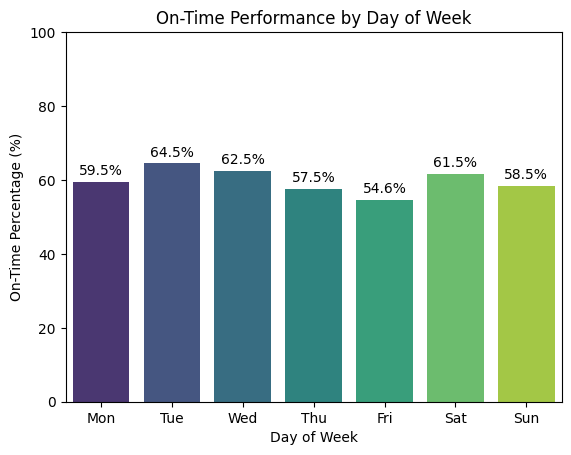

In [38]:
# plt.figure(figsize=(8, 6))
ax = sns.barplot(x='dayofweek', y='on_time_percent', data=df2, palette='viridis')
plt.title("On-Time Performance by Day of Week")

# Add percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v:.1f}%' for v in container.datavalues], padding=3)

plt.xlabel("Day of Week")
plt.ylabel("On-Time Percentage (%)")
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylim(0, 100)

# plt.tight_layout()
plt.show();

The analysis of on-time flight performance by day of the week reveals that **Tuesday** has the best on-time record, with **64.5%** of flights departing as scheduled. This is followed by **Wednesday (62.5%)** and **Saturday (61.5%)**. These days consistently outperform others, suggesting they experience fewer delays. In contrast, **Friday (54.6%)** shows the poorest on-time performance, likely due to increased travel demand at the end of the workweek. Passengers seeking more punctual departures may benefit from scheduling flights earlier in the week, especially on Tuesdays and Wednesdays.

<h2> 1.3 During which months or seasons are flights most likely to be on time? </h2>

In [39]:
query3 = """
    SELECT 
        month,
        COUNT(*) AS total_flights,
        SUM(CASE WHEN depdelay <= 0 THEN 1 ELSE 0 END) AS on_time_flights,
        ROUND(100.0 * SUM(CASE WHEN depdelay <= 0 THEN 1 ELSE 0 END) / COUNT(*), 2) AS on_time_percent
    FROM project2.airline_2006
    WHERE depdelay IS NOT NULL AND month IS NOT NULL
    GROUP BY month
    ORDER BY on_time_percent DESC
"""

df3 = pd.read_sql(query3, conn)
df3

C:\Users\user\AppData\Local\Temp\ipykernel_19392\1053818677.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(query3, conn)


,month,total_flights,on_time_flights,on_time_percent
0,1,571500,373711,65.39
1,9,574987,365002,63.48
2,5,595862,377765,63.40
3,4,578747,366335,63.30
4,2,519954,321583,61.85
5,3,597631,362424,60.64
6,11,576639,346415,60.07
7,8,618949,364544,58.90
8,10,600319,351441,58.54
9,6,588227,324327,55.14


In [167]:
# define month name
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

df3['month_name'] = df3['month'].map(month_map)
df3

,month,total_flights,on_time_flights,on_time_percent,month_name
0,1,571500,373711,65.39,Jan
1,9,574987,365002,63.48,Sep
2,5,595862,377765,63.40,May
3,4,578747,366335,63.30,Apr
4,2,519954,321583,61.85,Feb
5,3,597631,362424,60.64,Mar
6,11,576639,346415,60.07,Nov
7,8,618949,364544,58.90,Aug
8,10,600319,351441,58.54,Oct
9,6,588227,324327,55.14,Jun


In [42]:
query4 = """
    SELECT 
    CASE 
        WHEN month IN (12, 1, 2) THEN 'Winter'
        WHEN month IN (3, 4, 5) THEN 'Spring'
        WHEN month IN (6, 7, 8) THEN 'Summer'
        WHEN month IN (9, 10, 11) THEN 'Fall'
    END AS season,
    COUNT(*) AS total_flights,
    SUM(CASE WHEN depdelay <= 0 THEN 1 ELSE 0 END) AS on_time_flights,
    ROUND(100.0 * SUM(CASE WHEN depdelay <= 0 THEN 1 ELSE 0 END) / COUNT(*), 2) AS on_time_percent
    FROM project2.airline_2006
    WHERE depdelay IS NOT NULL AND month IS NOT NULL
    GROUP BY 
    CASE 
        WHEN month IN (12, 1, 2) THEN 'Winter'
        WHEN month IN (3, 4, 5) THEN 'Spring'
        WHEN month IN (6, 7, 8) THEN 'Summer'
        WHEN month IN (9, 10, 11) THEN 'Fall'
    END
    ORDER BY on_time_percent DESC
"""

df4 = pd.read_sql(query4, engine)
df4

,season,total_flights,on_time_flights,on_time_percent
0,Spring,1772240,1106524,62.44
1,Fall,1751945,1062858,60.67
2,Winter,1678118,1007028,60.01
3,Summer,1817685,1017923,56.00


C:\Users\user\AppData\Local\Temp\ipykernel_19392\583089132.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(ax = axs[0], x='month_name', y='on_time_percent', data=df3, palette='pastel')
C:\Users\user\AppData\Local\Temp\ipykernel_19392\583089132.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(ax=axs[1],x='season', y='on_time_percent', data=df4, palette='pastel')


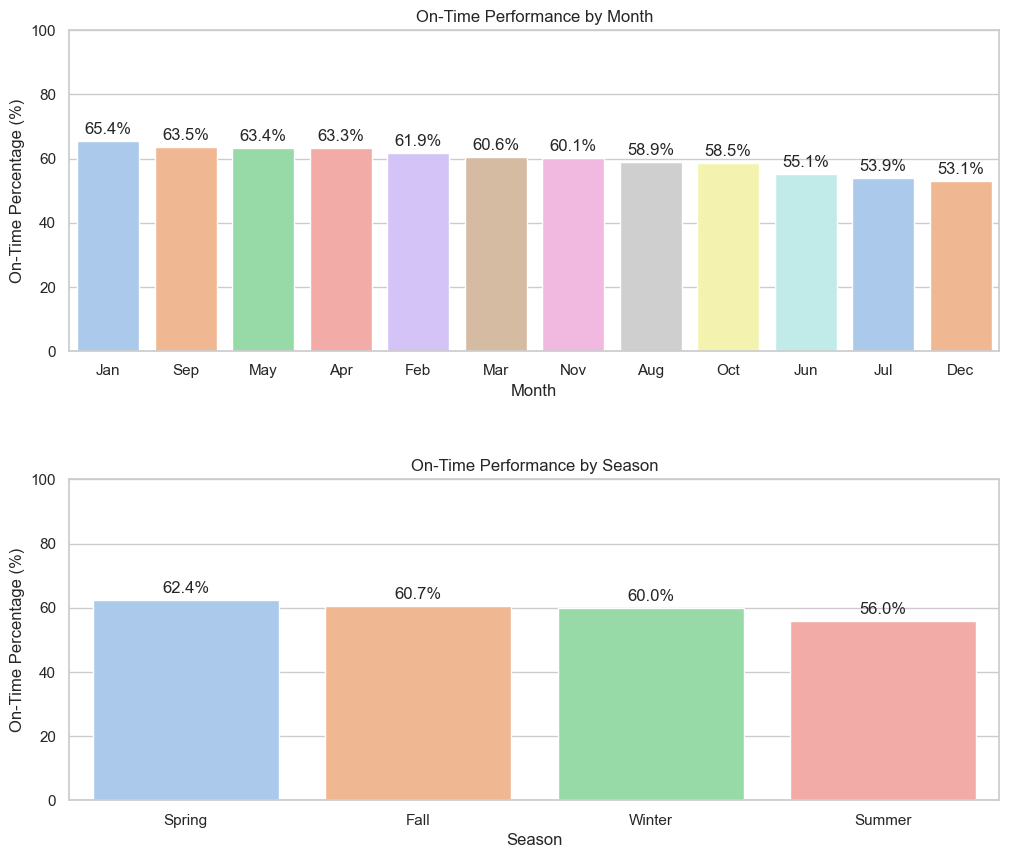

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12,10))
# combine month and season data
ax = sns.barplot(ax = axs[0], x='month_name', y='on_time_percent', data=df3, palette='pastel')

for container in ax.containers:
    ax.bar_label(container, labels=[f'{v:.1f}%' for v in container.datavalues], padding=3)

axs[0].set_ylim(0, 100)
axs[0].set_title("On-Time Performance by Month")
axs[0].set_xlabel("Month")
axs[0].set_ylabel("On-Time Percentage (%)")

ax = sns.barplot(ax=axs[1],x='season', y='on_time_percent', data=df4, palette='pastel')

for container in ax.containers:
    ax.bar_label(container, 
                 labels=[f'{v:.1f}%' for v in container.datavalues], 
                 padding=3)

axs[1].set_title("On-Time Performance by Season")
axs[1].set_xlabel("Season")
axs[1].set_ylabel("On-Time Percentage (%)")
axs[1].set_ylim(0, 100)
plt.subplots_adjust(hspace=0.4)
plt.show();

Based on the analysis, flights are most likely to be on time during the months of **January (65.4%), September (63.5%), May (63.4%)**, and **April (63.3%)**. These months show the highest percentages of on-time departures, indicating better operational efficiency and fewer disruptions.

When grouped by season, **Spring** emerges as the season with the best on-time performance at **62.4%**, followed by **Fall (60.7%)** and **Winter (60.0%)**. **Summer**, on the other hand, shows the lowest on-time performance at **56.0%**, likely due to increased travel volume and weather-related issues.

Overall, scheduling flights in **Spring or early in the year (e.g., January)** offers the highest likelihood of departing on time.

<h1 style='font-weight:bold'> 2. Delay Factors </h1>

<h2> 2.1 Identify and rank the top 3 - 5 factors contributing to flight delays, based on the delays categories provided in the dataset </h2>

In [80]:
query5 = """
    SELECT 
        'Carrier Delay' AS delay_type, 
        COUNT(*) AS total_delay 
    FROM project2.airline_2006
    WHERE carrierdelay > 0

    UNION ALL

    SELECT 
        'Weather Delay', 
        COUNT(*)
    FROM project2.airline_2006
    WHERE weatherdelay > 0

    UNION ALL

    SELECT 
        'NAS Delay', 
        COUNT(*)
    FROM project2.airline_2006
    WHERE nasdelay > 0

    UNION ALL

    SELECT 
        'Security Delay', 
        COUNT(*)
    FROM project2.airline_2006
    WHERE securitydelay > 0

    UNION ALL

    SELECT 
        'Late Aircraft Delay', 
        COUNT(*)
    FROM project2.airline_2006
    WHERE lateaircraftdelay > 0

    ORDER BY total_delay DESC
"""

df5 = pd.read_sql(query5, conn)
df5

C:\Users\user\AppData\Local\Temp\ipykernel_19392\1317040076.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5 = pd.read_sql(query5, conn)


,_u1.delay_type,_u1.total_delay
0,NAS Delay,941866
1,Late Aircraft Delay,731324
2,Carrier Delay,718349
3,Weather Delay,113743
4,Security Delay,10673


In [81]:
# display totaly delay in thousands ('000) for better readability
df5.columns = ['Delay Type', 'Total Delay']
df5["Total Delay ('000)"] = (df5['Total Delay'] / 1000).round(0)
df5

,Delay Type,Total Delay,Total Delay ('000)
0,NAS Delay,941866,942.0
1,Late Aircraft Delay,731324,731.0
2,Carrier Delay,718349,718.0
3,Weather Delay,113743,114.0
4,Security Delay,10673,11.0


In [86]:
df5['percentage'] = ((df5['Total Delay'] / df5['Total Delay'].sum()) * 100).round(2)
df5

,Delay Type,Total Delay,Total Delay ('000),percentage
0,NAS Delay,941866,942.0,37.44
1,Late Aircraft Delay,731324,731.0,29.07
2,Carrier Delay,718349,718.0,28.55
3,Weather Delay,113743,114.0,4.52
4,Security Delay,10673,11.0,0.42


C:\Users\user\AppData\Local\Temp\ipykernel_19392\2867255085.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[0], x='Delay Type', y="Total Delay ('000)", data=df5, palette='pastel')


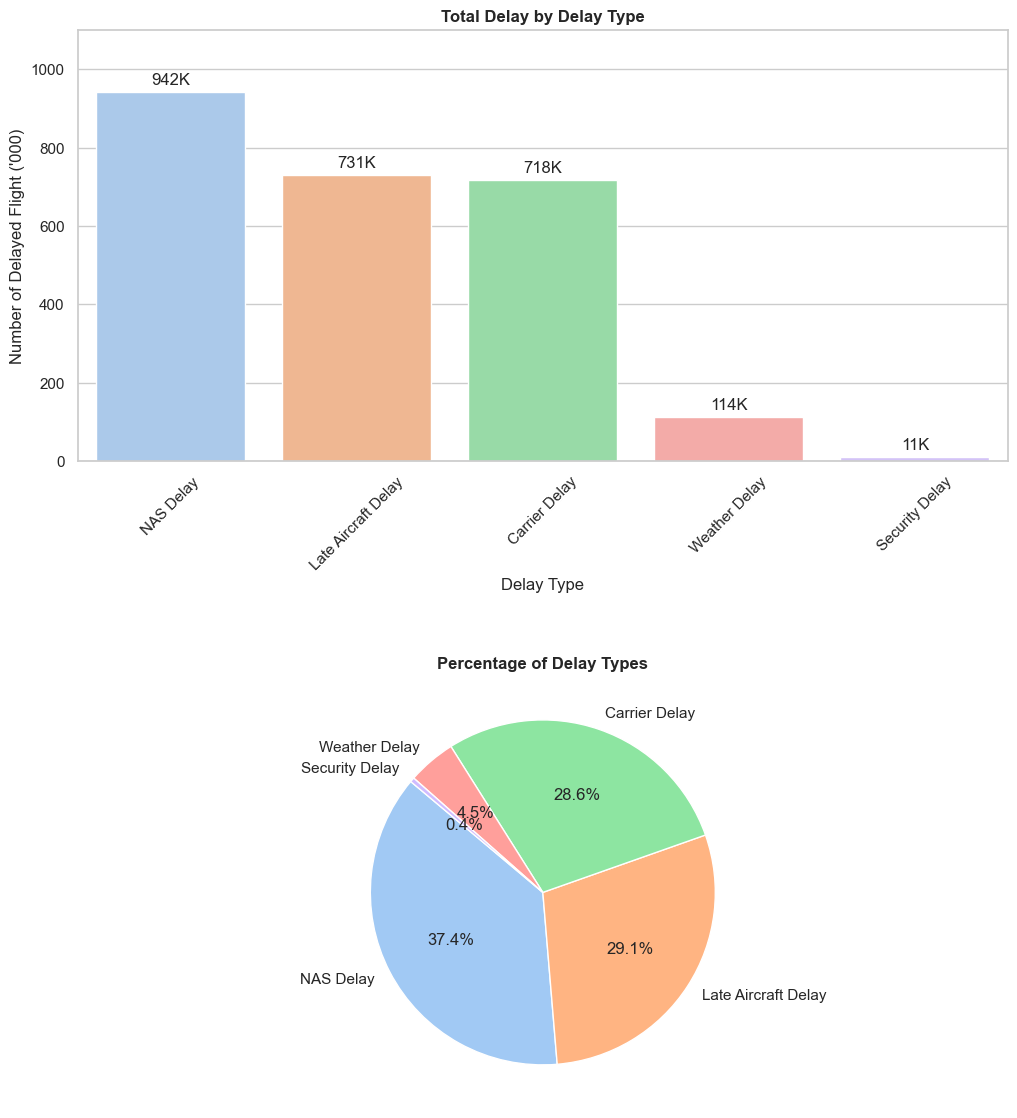

In [191]:
fig, axs = plt.subplots(2, 1, figsize=(12,14))

# Bar plot
sns.barplot(ax=axs[0], x='Delay Type', y="Total Delay ('000)", data=df5, palette='pastel')
for container in axs[0].containers:
    axs[0].bar_label(container, labels=[f'{v:.0f}K' for v in container.datavalues], padding=3)

axs[0].set_title("Total Delay by Delay Type", fontweight='bold')
axs[0].set_xlabel("Delay Type")
axs[0].set_ylabel("Number of Delayed Flight ('000)")
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_ylim(0, 1100)

# Pie chart
axs[1].pie(
    df5['percentage'],
    labels=df5['Delay Type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel', n_colors=len(df5))
)
axs[1].set_title('Percentage of Delay Types', fontweight='bold')


plt.subplots_adjust(hspace=0.5)
plt.show()


Based on both the number of delayed flights and the percentage of delay time, the top contributing factors to flight delays in 2006 are **NAS Delay, Late Aircraft Delay, and Carrier Delay**.

**NAS Delay (National Aviation System)** is the leading cause, responsible for **37.4%** of total delay time and affecting the highest number of flights—approximately **942,000**. This type of delay includes issues like air traffic control problems, heavy airport traffic, and system inefficiencies.

**Late Aircraft Delay** accounts for **29.1%** of total delay time and impacts around **731,000** flights. These delays occur when a previous flight arrives late, causing a ripple effect across the schedule.

**Carrier Delay** makes up **28.6%** of the total delay time, affecting roughly **718,000** flights. These are delays caused by the airline itself, such as crew availability, aircraft preparation, or logistical setbacks.

While **Weather Delays** and **Security Delays** are present, their contributions are much smaller with only **4.5%** and **0.4%** of total delay time, respectively—making them less significant in comparison.

In summary, NAS Delay, Late Aircraft Delay, and Carrier Delay are the top three factors contributing to flight delays, both in terms of frequency and total delay time, indicating that operational and systemic improvements in these areas could lead to significant enhancements in overall flight punctuality.

<h2> 2.2 Quantify the impact of each factor (in minutes of delay and percentage of total delays). </h2>

In [75]:
query6 = """
    WITH delay_totals AS (
    SELECT
        SUM(carrierdelay) AS carrier,
        SUM(weatherdelay) AS weather,
        SUM(nasdelay) AS nas,
        SUM(securitydelay) AS security,
        SUM(lateaircraftdelay) AS late_aircraft
    FROM project2.airline_2006
    ),
    total_delay AS (
    SELECT
        (carrier + weather + nas + security + late_aircraft) AS grand_total
    FROM delay_totals
    )

    SELECT
    'Carrier Delay' AS delay_type,
    dt.carrier AS delay_minutes,
    ROUND(100.0 * dt.carrier / td.grand_total, 2) AS percentage
    FROM delay_totals dt, total_delay td

    UNION ALL

    SELECT
    'Weather Delay',
    dt.weather,
    ROUND(100.0 * dt.weather / td.grand_total, 2)
    FROM delay_totals dt, total_delay td

    UNION ALL

    SELECT
    'NAS Delay',
    dt.nas,
    ROUND(100.0 * dt.nas / td.grand_total, 2)
    FROM delay_totals dt, total_delay td

    UNION ALL

    SELECT
    'Security Delay',
    dt.security,
    ROUND(100.0 * dt.security / td.grand_total, 2)
    FROM delay_totals dt, total_delay td

    UNION ALL

    SELECT
    'Late Aircraft Delay',
    dt.late_aircraft,
    ROUND(100.0 * dt.late_aircraft / td.grand_total, 2)
    FROM delay_totals dt, total_delay td

    ORDER BY percentage DESC
"""

df6 = pd.read_sql(query6, engine)
df6.columns = ['delay_type', 'delay_minutes', 'percentage']
df6


,delay_type,delay_minutes,percentage
0,Late Aircraft Delay,32245816,36.98
1,NAS Delay,25610715,29.37
2,Carrier Delay,24255294,27.82
3,Weather Delay,4853843,5.57
4,Security Delay,221371,0.25


In [90]:
# display totaly delay in thousands ('000) for better readability
df6["Total Delay in minutes ('000)"] = (df6['delay_minutes'] / 1000).round(0)
df6

,delay_type,delay_minutes,percentage,Total Delay in minutes ('000)
0,Late Aircraft Delay,32245816,36.98,32246.0
1,NAS Delay,25610715,29.37,25611.0
2,Carrier Delay,24255294,27.82,24255.0
3,Weather Delay,4853843,5.57,4854.0
4,Security Delay,221371,0.25,221.0


C:\Users\user\AppData\Local\Temp\ipykernel_19392\1654983689.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[0], x='delay_type', y="Total Delay in minutes ('000)", data=df6, palette='pastel')


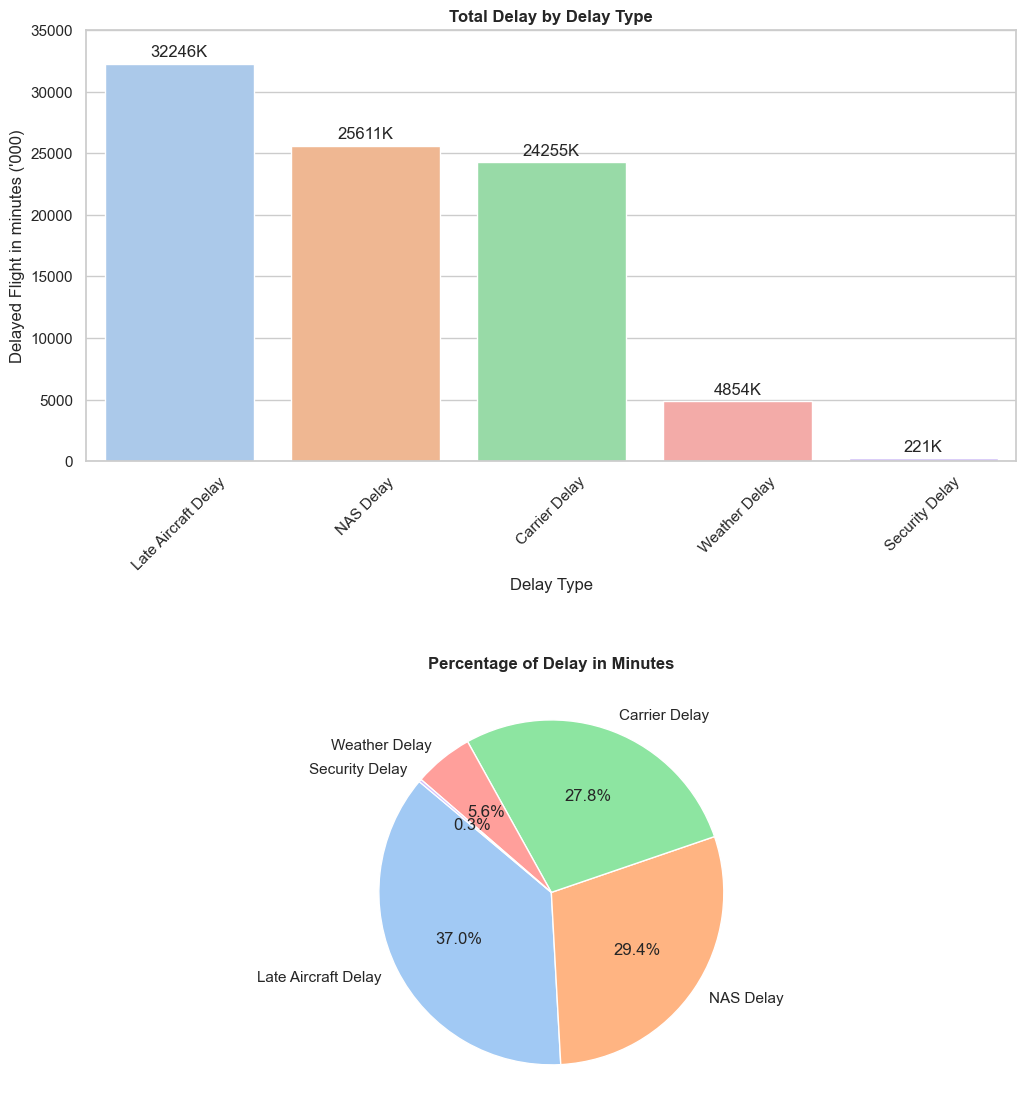

In [189]:
fig, axs = plt.subplots(2, 1, figsize=(12, 14))

# Bar plot
sns.barplot(ax=axs[0], x='delay_type', y="Total Delay in minutes ('000)", data=df6, palette='pastel')
for container in axs[0].containers:
    axs[0].bar_label(container, labels=[f'{v:.0f}K' for v in container.datavalues], padding=3)
axs[0].set_title("Total Delay by Delay Type", fontweight='bold')
axs[0].set_xlabel("Delay Type")
axs[0].set_ylabel("Delayed Flight in minutes ('000)")
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_ylim(0, 35000)

# Pie chart
axs[1].pie(
    df6['percentage'],
    labels=df6['delay_type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel', n_colors=len(df6))
)
axs[1].set_title('Percentage of Delay in Minutes', fontweight='bold')

plt.subplots_adjust(hspace=0.5)
plt.show()


Based on the analysis of the 2006 airline delay data, the total delay time can be broken down by category both in **minutes** and **percentage of overall delays**.

The most impactful factor is **Late Aircraft Delay**, contributing approximately **32.2 million minutes**, which makes up **37.0%** of total delay time. This type of delay is caused when a flight is delayed due to the late arrival of a previous flight using the same aircraft.

**NAS (National Aviation System) Delay** accounts for around **25.6 million minutes**, or **29.4%** of all delays. These delays include issues like air traffic control restrictions, airport congestion, and other system-related inefficiencies.

**Carrier Delay** follows closely with **24.3 million minutes**, making up **27.8%** of total delays. These are typically caused by internal airline operations such as crew or aircraft preparation.

**Weather Delay** contributes approximately **4.9 million minutes**, or **5.6%**, and includes delays caused by weather conditions such as storms or low visibility that affect flight safety.

Lastly, **Security Delay** is the least significant, contributing only about **221,000 minutes**, or **0.3%**, and is usually caused by security clearance issues or related procedures.

This quantification highlights that improving airline turnaround operations, air traffic system efficiency, and carrier logistics could substantially reduce the majority of delays.

<h1 style='font-weight:bold'> 3. Cancellation Analysis </h1>

<h2> 3.1 Identify the primary reasons for flight cancellations as categorized in the dataset. </h2>

In [95]:
query7 = """
    SELECT
    CASE cancellationcode
        WHEN 'A' THEN 'Carrier'
        WHEN 'B' THEN 'Weather'
        WHEN 'C' THEN 'NAS'
        WHEN 'D' THEN 'Security'
        ELSE 'Unknown'
    END AS cancellation_reason,
    COUNT(*) AS total_cancellations
    FROM project2.airline_2006
    WHERE cancelled = 1 AND cancellationcode IS NOT NULL
    GROUP BY
    CASE cancellationcode
        WHEN 'A' THEN 'Carrier'
        WHEN 'B' THEN 'Weather'
        WHEN 'C' THEN 'NAS'
        WHEN 'D' THEN 'Security'
        ELSE 'Unknown'
    END
    ORDER BY total_cancellations DESC
"""

df7 = pd.read_sql(query7, conn)
df7

C:\Users\user\AppData\Local\Temp\ipykernel_19392\3073624163.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df7 = pd.read_sql(query7, conn)


,cancellation_reason,total_cancellations
0,Carrier,55655
1,Weather,37913
2,NAS,28209
3,Security,157


C:\Users\user\AppData\Local\Temp\ipykernel_19392\2876271191.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='cancellation_reason', y='total_cancellations', data=df7, palette='pastel')


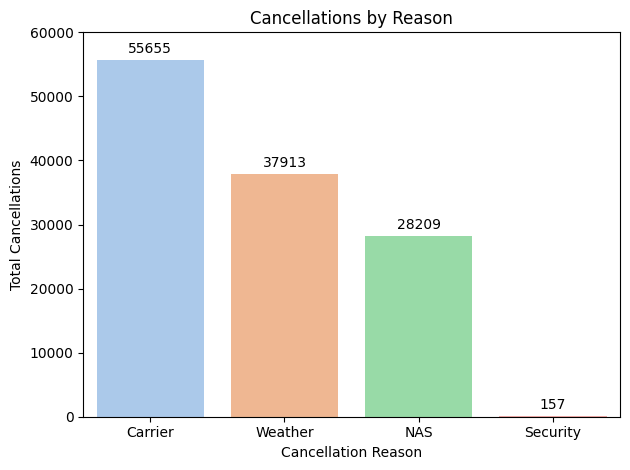

In [119]:
ax = sns.barplot(x='cancellation_reason', y='total_cancellations', data=df7, palette='pastel')
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v:.0f}' for v in container.datavalues], padding=3)
plt.title("Cancellations by Reason")
plt.xlabel("Cancellation Reason")
plt.ylabel("Total Cancellations")
plt.ylim(0, 60000)
plt.tight_layout()
plt.show();

Based on the 2006 airline data, the primary reasons for flight cancellations can be categorized into four main groups: **Carrier**, **Weather**, **NAS (National Aviation System)**, and **Security**. Among these, **Carrier-related issues** are the leading cause of cancellations, with a total of **55,655 cancellations**. These are typically due to airline-specific problems such as crew unavailability, maintenance issues, or aircraft problems.

**Weather-related cancellations** are the second most common, accounting for **37,913 cancellations**, and are usually caused by conditions such as storms, fog, or snow that make flying unsafe.

**NAS-related cancellations**, which include factors such as air traffic control restrictions and airport operations, contributed to **28,209 cancellations**.

Lastly, **Security-related cancellations** are extremely rare, with only **157 cases** recorded, typically involving security threats or breaches at the airport.

This breakdown highlights that operational issues within airlines are the most significant factor behind cancellations, followed by external factors like weather and air traffic system inefficiencies.


<h2> 3.2 Determine if cancellations correlate with specific airlines, airports, or time periods. </h2>

In [98]:
# by airline
query8 = """
    SELECT
        a.uniquecarrier AS airline,
        c.description AS airline_name,
        COUNT(*) AS total_flights,
        SUM(CASE WHEN cancelled = 1 THEN 1 ELSE 0 END) AS cancellations,
        ROUND(100.0 * SUM(CASE WHEN cancelled = 1 THEN 1 ELSE 0 END) / COUNT(*), 2) AS cancel_rate
    FROM project2.airline_2006 a
    LEFT JOIN project2.carriers c ON a.uniquecarrier = c.code
    GROUP BY a.uniquecarrier, c.description
    ORDER BY cancel_rate DESC
"""

df8 = pd.read_sql(query8, conn)
df8

C:\Users\user\AppData\Local\Temp\ipykernel_19392\1271864442.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df8 = pd.read_sql(query8, conn)


,airline,airline_name,total_flights,cancellations,cancel_rate
0,MQ,American Eagle Airlines Inc.,550088,19990,3.63
1,YV,Mesa Airlines Inc.,304764,9544,3.13
2,EV,Atlantic Southeast Airlines,273143,6783,2.48
3,OH,Comair Inc.,278099,6875,2.47
4,OO,Skywest Airlines Inc.,548109,12844,2.34
5,XE,Expressjet Airlines Inc.,441470,9716,2.20
6,AQ,Aloha Airlines Inc.,35387,745,2.11
7,UA,United Air Lines Inc.,500008,10238,2.05
8,AA,American Airlines Inc.,643597,10127,1.57
9,DL,Delta Air Lines Inc.,506086,7695,1.52


C:\Users\user\AppData\Local\Temp\ipykernel_19392\1031312278.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='airline_name', y='cancel_rate', data=df8, palette='pastel')
C:\Users\user\AppData\Local\Temp\ipykernel_19392\1031312278.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


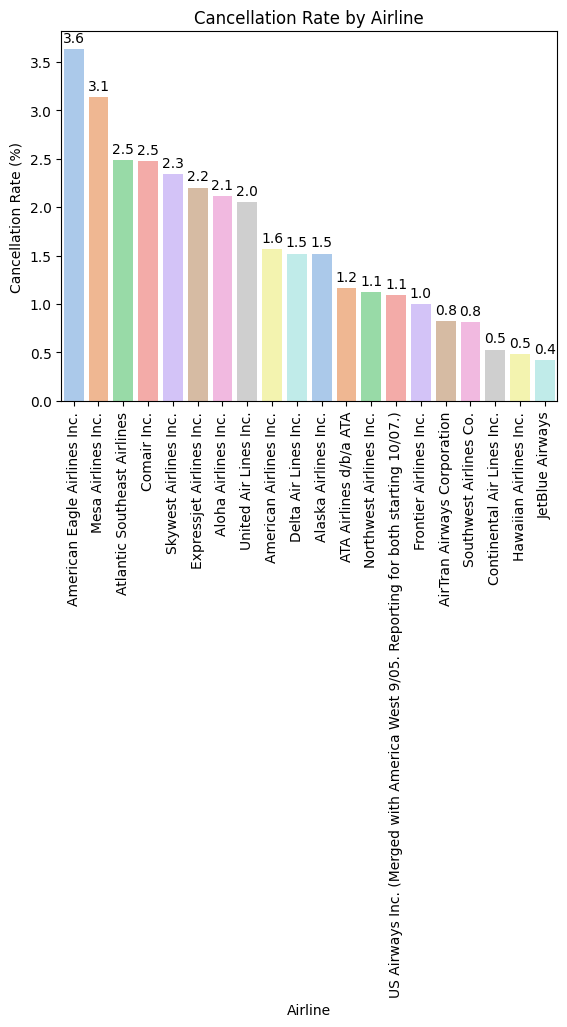

In [118]:
# plot cancellation rate by airline
ax = sns.barplot(x='airline_name', y='cancel_rate', data=df8, palette='pastel')
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v:.1f}' for v in container.datavalues], padding=3)
plt.title("Cancellation Rate by Airline")
plt.xlabel("Airline")
plt.ylabel("Cancellation Rate (%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show();

In [150]:
# by origin airport
query9 = """
  SELECT
    a.origin AS airport,
    b.airport AS airport_name,
    COUNT(*) AS total_flights,
    SUM(CASE WHEN cancelled = 1 THEN 1 ELSE 0 END) AS cancellations,
    ROUND(100.0 * SUM(CASE WHEN cancelled = 1 THEN 1 ELSE 0 END) / COUNT(*), 2) AS cancel_rate
  FROM project2.airline_2006 a
  LEFT JOIN project2.airports b ON a.origin = b.iata
  GROUP BY a.origin, b.airport
  ORDER BY cancel_rate DESC
"""

df9 = pd.read_sql(query9, conn)
df9

C:\Users\user\AppData\Local\Temp\ipykernel_19392\1955084534.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df9 = pd.read_sql(query9, conn)


,airport,airport_name,total_flights,cancellations,cancel_rate
0,TEX,Telluride Regional,273,33,12.09
1,HKY,Hickory Municipal,42,5,11.90
2,ACK,Nantucket Memorial,235,26,11.06
3,ADK,Adak,104,11,10.58
4,ASE,Aspen-Pitkin Co/Sardy,3733,294,7.88
...,...,...,...,...,...
284,BQN,Rafael Hernandez,1254,4,0.32
285,SGU,St George Muni,3447,8,0.23
286,CKB,Benedum,1,0,0.00
287,LWS,Lewiston-Nez Perce County,725,0,0.00


C:\Users\user\AppData\Local\Temp\ipykernel_19392\1613906183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='airport_name', y='cancel_rate', data=df9.head(20), palette='pastel')


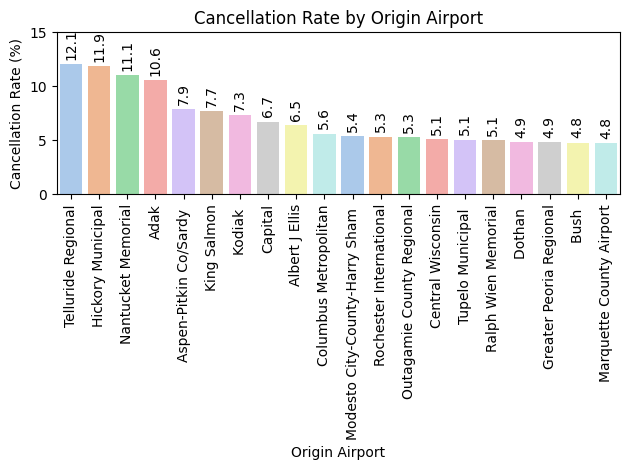

In [124]:
# plot cancellation rate by airport
ax = sns.barplot(x='airport_name', y='cancel_rate', data=df9.head(20), palette='pastel')

for container in ax.containers:
    ax.bar_label(container, 
                 labels=[f'{v:.1f}' for v in container.datavalues], 
                 padding=3,
                 rotation=90)

plt.title("Cancellation Rate by Origin Airport")
plt.xlabel("Origin Airport")
plt.ylabel("Cancellation Rate (%)")
plt.xticks(rotation=90)
plt.ylim(0, 15)
plt.tight_layout()
plt.show();

In [102]:
# by month
query10 = """
    SELECT
        month,
        COUNT(*) AS total_flights,
        SUM(CASE WHEN cancelled = 1 THEN 1 ELSE 0 END) AS cancellations,
        ROUND(100.0 * SUM(CASE WHEN cancelled = 1 THEN 1 ELSE 0 END) / COUNT(*), 2) AS cancel_rate
    FROM project2.airline_2006
    GROUP BY month
    ORDER BY cancel_rate DESC
"""

df10 = pd.read_sql(query10, conn)
df10;

C:\Users\user\AppData\Local\Temp\ipykernel_19392\3954611562.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df10 = pd.read_sql(query10, conn)


In [125]:
# define month name
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

df10['month_name'] = df10['month'].map(month_map)
df10

,month,total_flights,cancellations,cancel_rate,month_name
0,12,604758,18094,2.99,Dec
1,2,531247,11293,2.13,Feb
2,10,611718,11399,1.86,Oct
3,7,621244,10735,1.73,Jul
4,9,584937,9950,1.70,Sep
5,6,598315,10088,1.69,Jun
6,1,581287,9787,1.68,Jan
7,11,586197,9558,1.63,Nov
8,8,628732,9783,1.56,Aug
9,3,605217,7586,1.25,Mar


C:\Users\user\AppData\Local\Temp\ipykernel_19392\3406666130.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='month_name', y='cancel_rate', data=df10.head(20), palette='pastel')


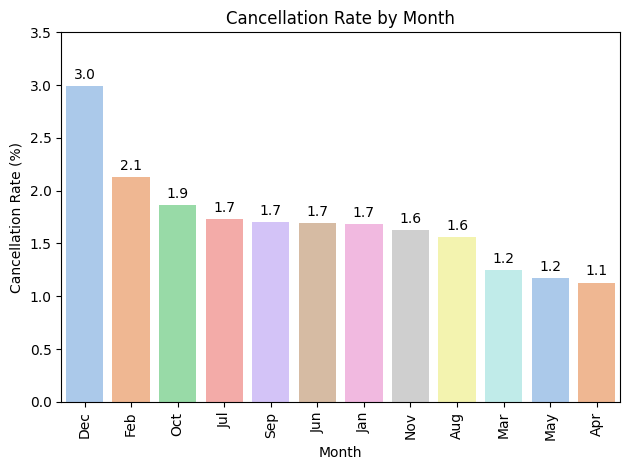

In [128]:
# plot cancellation rate by month
ax = sns.barplot(x='month_name', y='cancel_rate', data=df10.head(20), palette='pastel')
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v:.1f}' for v in container.datavalues], padding=3)
plt.title("Cancellation Rate by Month")
plt.xlabel("Month")
plt.ylabel("Cancellation Rate (%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(0, 3.5)
plt.show();

Based on the analysis, flight cancellations do show a clear correlation with **specific airlines, airports, and time periods**.

Among airlines, **American Eagle Airlines Inc.** has the highest cancellation rate at **3.6%**, followed by **Mesa Airlines Inc. (3.1%)** and **Atlantic Southeast Airlines (2.5%)**. This suggests that some carriers experience higher operational or logistical challenges leading to more frequent cancellations compared to others like **JetBlue Airways**, which has the lowest rate at **0.4%**.

In terms of airports, **Telluride Regional** has the highest cancellation rate at **12.1%**, followed closely by **Hickory Municipal (11.9%)** and **Nantucket Memorial (11.1%)**. These are often smaller or remote airports, where cancellations may be more sensitive to weather, limited resources, or connectivity issues.

When looking at time periods, **December** shows the highest cancellation rate at **3.0%**, likely due to winter weather disruptions and increased travel during the holiday season. Other months like **February (2.1%)** and **October (1.9%)** also show elevated rates, while **April** has the lowest at **1.1%**.

In summary, the data indicates that cancellations are **not randomly distributed**, but are influenced by airline reliability, airport characteristics, and seasonal or monthly patterns.


<h1 style='font-weight:bold'> 4. Problematic Routes </h1>

<h2> 4.1 Identify specific routes (origin-destination pairs), carriers, or flight numbers that show consistently poor performance </h2>

In [126]:
# by route
query11 = """
    SELECT
        origin,
        dest,
        COUNT(*) AS total_flights,
        AVG(depdelay) AS avg_depdelay,
        SUM(CASE WHEN cancelled = 1 THEN 1 ELSE 0 END) AS cancellations,
        ROUND(100.0 * SUM(CASE WHEN cancelled = 1 THEN 1 ELSE 0 END) / COUNT(*), 2) AS cancel_rate
    FROM project2.airline_2006
    WHERE depdelay IS NOT NULL OR cancelled = 1
    GROUP BY origin, dest
    HAVING COUNT(*) >= 100  -- Filter out rare routes
    ORDER BY avg_depdelay DESC, cancel_rate DESC
    LIMIT 10
"""

df11 = pd.read_sql(query11, conn)
df11

C:\Users\user\AppData\Local\Temp\ipykernel_19392\1881512109.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df11 = pd.read_sql(query11, conn)


,origin,dest,total_flights,avg_depdelay,cancellations,cancel_rate
0,ORD,AVP,723,40.308029,38,5.26
1,ADK,AKN,103,39.000000,10,9.71
2,PHL,OAK,365,37.462604,4,1.10
3,MSN,MQT,171,36.512346,9,5.26
4,ORD,CAE,1647,35.690051,79,4.80
5,MSN,EWR,312,34.898361,7,2.24
6,ATL,CID,180,34.719101,2,1.11
7,CAE,ORD,1649,34.651476,91,5.52
8,LGA,BTR,109,34.184466,6,5.50
9,MSN,LGA,304,34.081272,21,6.91


In [129]:
df11['route'] = df11['origin'] + ' - ' + df11['dest']
df11

,origin,dest,total_flights,avg_depdelay,cancellations,cancel_rate,route
0,ORD,AVP,723,40.308029,38,5.26,ORD - AVP
1,ADK,AKN,103,39.000000,10,9.71,ADK - AKN
2,PHL,OAK,365,37.462604,4,1.10,PHL - OAK
3,MSN,MQT,171,36.512346,9,5.26,MSN - MQT
4,ORD,CAE,1647,35.690051,79,4.80,ORD - CAE
5,MSN,EWR,312,34.898361,7,2.24,MSN - EWR
6,ATL,CID,180,34.719101,2,1.11,ATL - CID
7,CAE,ORD,1649,34.651476,91,5.52,CAE - ORD
8,LGA,BTR,109,34.184466,6,5.50,LGA - BTR
9,MSN,LGA,304,34.081272,21,6.91,MSN - LGA


C:\Users\user\AppData\Local\Temp\ipykernel_19392\3534585990.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='route', y='avg_depdelay', data=df11, palette='pastel', ax=ax1)
C:\Users\user\AppData\Local\Temp\ipykernel_19392\3534585990.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


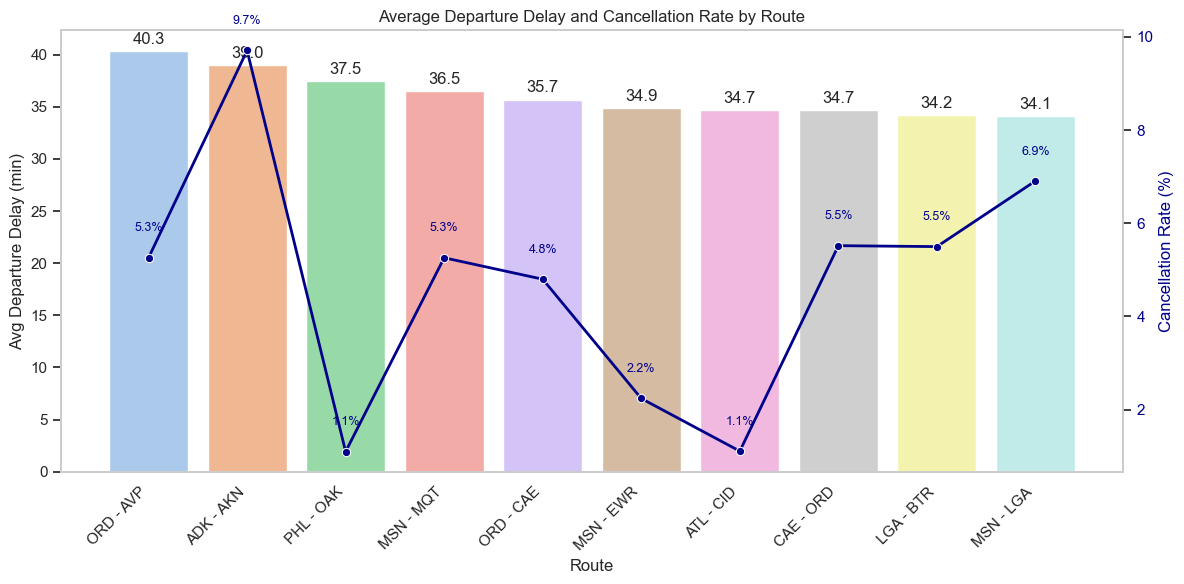

In [193]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot (left y-axis)
sns.barplot(x='route', y='avg_depdelay', data=df11, palette='pastel', ax=ax1)
ax1.set_ylabel('Avg Departure Delay (min)')
ax1.set_xlabel('Route')
ax1.tick_params(axis='y')
ax1.set_title('Average Departure Delay and Cancellation Rate by Route')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

for container in ax1.containers:
    ax1.bar_label(container, labels=[f'{v:.1f}' for v in container.datavalues], padding=3)

# Remove grid
ax1.grid(False)

# Line plot (right y-axis)
ax2 = ax1.twinx()
sns.lineplot(x='route', y='cancel_rate', data=df11, color='darkblue', marker='o', linewidth=2, ax=ax2)
ax2.set_ylabel('Cancellation Rate (%)', color='darkblue')
ax2.tick_params(axis='y', labelcolor='darkblue')

# Add labels to each point in the line plot
for x, y in zip(df11['route'], df11['cancel_rate']):
    ax2.text(x, y + 0.5, f'{y:.1f}%', color='darkblue', ha='center', va='bottom', fontsize=9, rotation=0)

# Remove grid from right axis as well
ax2.grid(False)

plt.tight_layout()
plt.show()


Based on the analysis of average departure delays and cancellation rates by route, several origin-destination pairs exhibit consistently poor performance, indicating potential reliability issues.

The **ORD–AVP** and **ADK–AKN** routes stand out with the highest average delays, at **40.3** and **39.0 minutes**, respectively. Among these, **ADK–AKN** is particularly problematic as it also has the highest cancellation rate at **9.7%**, suggesting a dual concern of both frequent delays and cancellations. This could be attributed to **limited airport infrastructure**, **weather sensitivity**, or **operational constraints** on less trafficked regional routes.

Other routes such as **MSN–MQT** (36.5 min, 5.3%), **ORD–CAE** (35.7 min, 4.8%), and **MSN–LGA** (34.1 min, 6.9%) also demonstrate a combination of moderate to high delay times with above-average cancellation rates. These routes may be impacted by congestion at major hubs (e.g., **ORD**, **LGA**) or vulnerability to regional disruptions (e.g., **MSN**, **MQT**).

In contrast, routes like **PHL–OAK** and **ATL–CID** have relatively high delay times (37.5 and 34.7 minutes, respectively) but **low cancellation rates (1.1%)**, suggesting that while flights tend to be delayed, they are rarely canceled, potentially due to better handling capacity or less weather interference.

In conclusion, routes such as **ADK–AKN**, **ORD–AVP**, and **MSN–LGA** deserve further attention as they show both high delay and cancellation rates, likely due to a combination of regional operational challenges, weather conditions, and air traffic congestion.


In [137]:
# by flight number
query12 = """
        SELECT
        flightnum,
        COUNT(*) AS total_flights,
        AVG(depdelay) AS avg_depdelay,
        ROUND(100.0 * SUM(CASE WHEN cancelled = 1 THEN 1 ELSE 0 END) / COUNT(*), 2) AS cancel_rate
    FROM project2.airline_2006
    WHERE depdelay IS NOT NULL OR cancelled = 1
    GROUP BY flightnum
    HAVING COUNT(*) >= 100  -- Filter out uncommon flights
    ORDER BY avg_depdelay DESC, cancel_rate DESC
    LIMIT 10
"""

df12 = pd.read_sql(query12, conn)
df12

C:\Users\user\AppData\Local\Temp\ipykernel_19392\1195232435.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df12 = pd.read_sql(query12, conn)


,flightnum,total_flights,avg_depdelay,cancel_rate
0,7465,152,50.762238,5.92
1,7458,166,50.700637,5.42
2,7426,103,50.085366,20.39
3,7472,174,47.592357,9.77
4,7363,220,47.384236,7.73
5,7364,294,47.233577,6.80
6,7461,171,46.937500,6.43
7,4931,116,46.017544,1.72
8,7362,446,45.212048,6.95
9,7358,426,45.065445,10.33


In [139]:
df12['flightnum'] = df12['flightnum'].astype(str)

C:\Users\user\AppData\Local\Temp\ipykernel_19392\1424355450.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='flightnum', y='avg_depdelay', data=df12, palette='pastel', ax=ax1)
C:\Users\user\AppData\Local\Temp\ipykernel_19392\1424355450.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


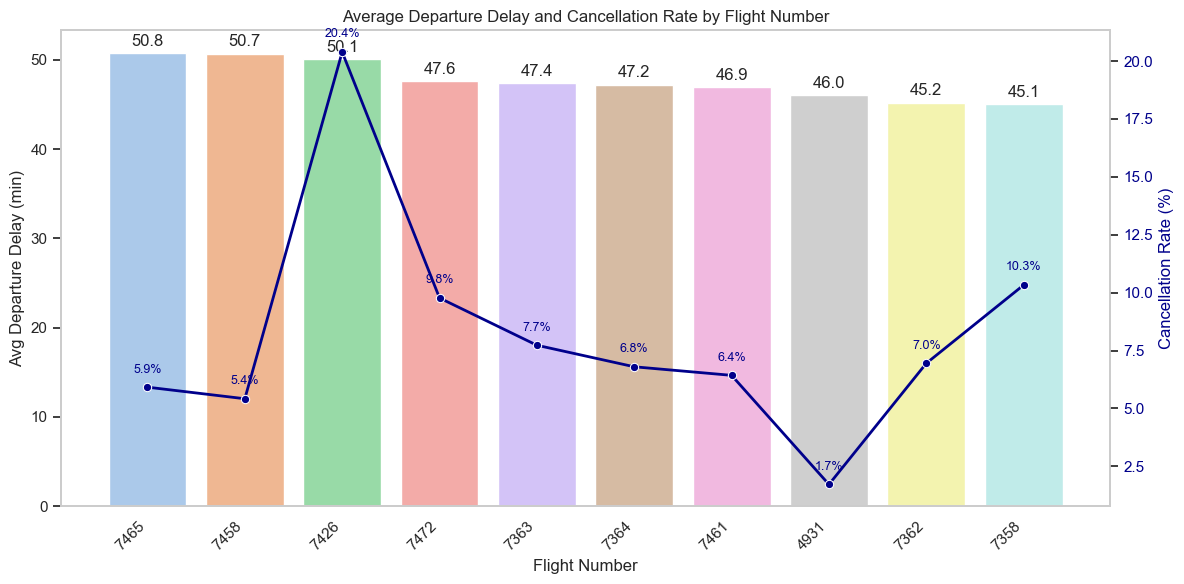

In [194]:
# Create a combined bar and line plot for both metrics
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average departure delay
sns.barplot(x='flightnum', y='avg_depdelay', data=df12, palette='pastel', ax=ax1)
ax1.set_ylabel('Avg Departure Delay (min)')
ax1.set_xlabel('Flight Number')
ax1.tick_params(axis='y')
ax1.set_title('Average Departure Delay and Cancellation Rate by Flight Number')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(False)

for container in ax1.containers:
    ax1.bar_label(container, labels=[f'{v:.1f}' for v in container.datavalues], padding=3)

# Create a second y-axis to plot cancellation rate
ax2 = ax1.twinx()
sns.lineplot(x='flightnum', y='cancel_rate', data=df12, color='darkblue', marker='o', linewidth=2, ax=ax2)
ax2.set_ylabel('Cancellation Rate (%)', color='darkblue')
ax2.tick_params(axis='y', labelcolor='darkblue')
ax2.grid(False)

for x, y in zip(df12['flightnum'], df12['cancel_rate']):
    ax2.text(x, y + 0.5, f'{y:.1f}%', color='darkblue', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

The analysis of flight performance by flight number reveals several flights with consistently poor reliability, based on both **average departure delays** and **cancellation rates**.

**Flight 7465** and **Flight 7458** show the highest average delays at **50.8** and **50.7 minutes**, respectively, with moderate cancellation rates of **5.9%** and **5.4%**. This suggests operational inefficiencies or persistent scheduling issues.

**Flight 7426**, although slightly lower in delay time (**50.1 minutes**), stands out due to its **extremely high cancellation rate of 20.4%**, making it the **most unreliable** in terms of overall performance. This combination indicates potential recurring disruptions such as aircraft unavailability, crew rotation issues, or route-specific challenges.

Other flights like **7472 (47.6 min, 8.8%)**, **7363 (47.4 min, 7.7%)**, and **7358 (45.1 min, 10.3%)** also display a balance of high delays and elevated cancellation rates, indicating broader systemic issues affecting those flight schedules.

In contrast, **Flight 4931**, despite a relatively high delay average of **46.0 minutes**, has a **low cancellation rate (1.7%)**, suggesting the flight often experiences delays but is rarely canceled, likely due to strong operational prioritization or backup planning.

Overall, **Flight 7426**, **7358**, and **7472** are among the worst-performing in terms of both delay and cancellation, highlighting a need for airlines to review their scheduling efficiency, crew assignments, or route-level constraints to enhance punctuality and reduce disruption.


In [197]:
# by carriers
query13 = """
    SELECT
        a.uniquecarrier,
        b.description,
        COUNT(*) AS total_flights,
        AVG(depdelay) AS avg_depdelay,
        ROUND(100.0 * SUM(CASE WHEN cancelled = 1 THEN 1 ELSE 0 END) / COUNT(*), 2) AS cancel_rate
    FROM project2.airline_2006 a
    LEFT JOIN project2.carriers b ON a.uniquecarrier = b.code
    WHERE depdelay IS NOT NULL OR cancelled = 1
    GROUP BY a.uniquecarrier, b.description
    HAVING COUNT(*) >= 100  -- Filter out uncommon flights
    ORDER BY avg_depdelay DESC, cancel_rate DESC
"""

df13 = pd.read_sql(query13, conn)
df13

C:\Users\user\AppData\Local\Temp\ipykernel_19392\2370282712.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df13 = pd.read_sql(query13, conn)


,a.uniquecarrier,b.description,total_flights,avg_depdelay,cancel_rate
0,EV,Atlantic Southeast Airlines,273143,16.412637,2.48
1,YV,Mesa Airlines Inc.,304764,14.248852,3.13
2,TZ,ATA Airlines d/b/a ATA,19602,12.860129,1.16
3,UA,United Air Lines Inc.,500008,11.907026,2.05
4,MQ,American Eagle Airlines Inc.,550088,11.460402,3.63
5,B6,JetBlue Airways,155732,11.293913,0.42
6,CO,Continental Air Lines Inc.,309389,11.025950,0.53
7,FL,AirTran Airways Corporation,237645,10.972584,0.82
8,AA,American Airlines Inc.,643597,10.698082,1.57
9,WN,Southwest Airlines Co.,1099321,10.294059,0.81


C:\Users\user\AppData\Local\Temp\ipykernel_19392\940727984.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='b.description', y='avg_depdelay', data=df13, palette='pastel', ax=ax1)
C:\Users\user\AppData\Local\Temp\ipykernel_19392\940727984.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


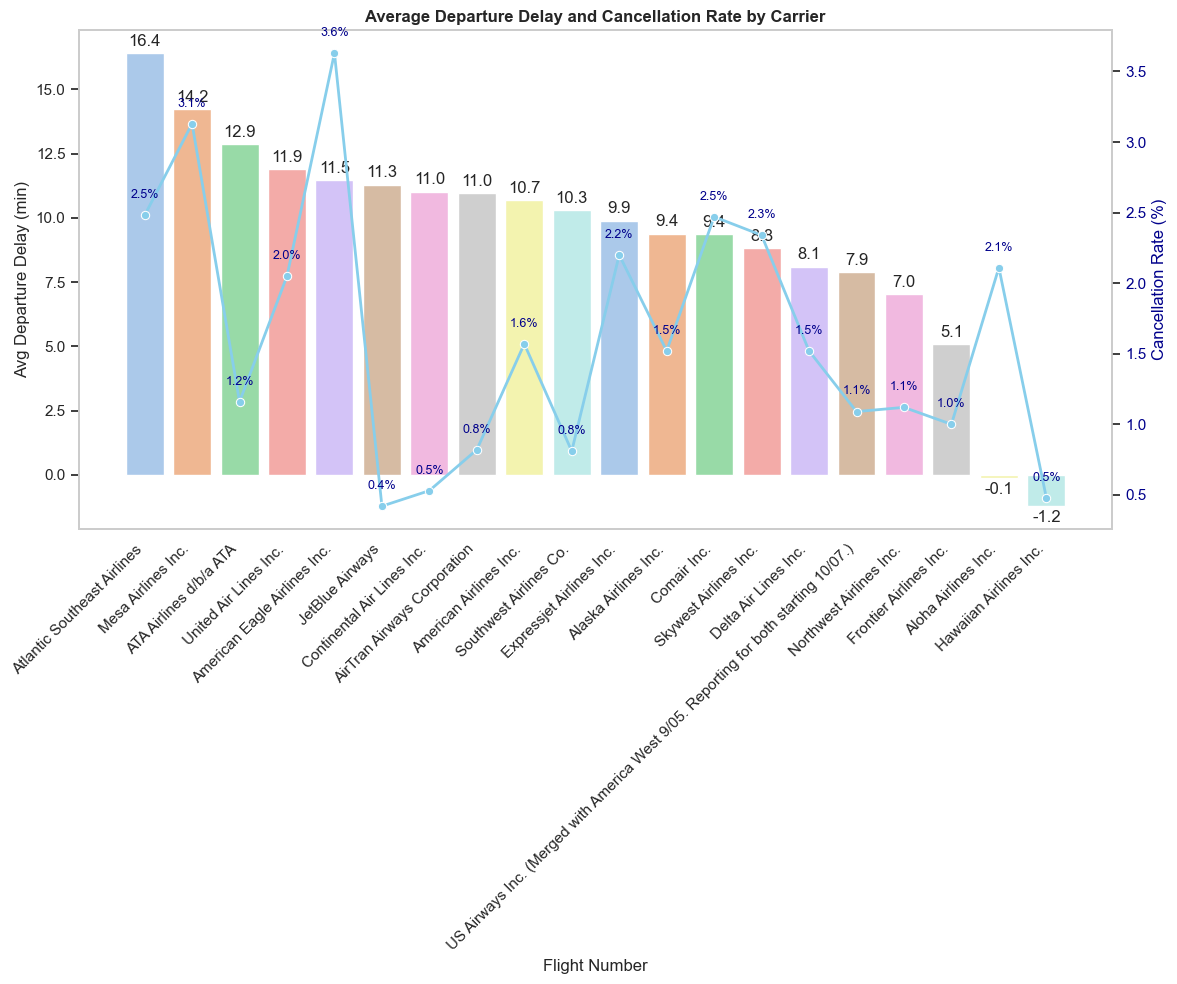

In [205]:
# Create a combined bar and line plot for both metrics
fig, ax1 = plt.subplots(figsize=(12, 10))

# Bar plot for average departure delay
sns.barplot(x='b.description', y='avg_depdelay', data=df13, palette='pastel', ax=ax1)
ax1.set_ylabel('Avg Departure Delay (min)')
ax1.set_xlabel('Flight Number')
ax1.tick_params(axis='y')
ax1.set_title('Average Departure Delay and Cancellation Rate by Carrier', fontweight='bold')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(False)

for container in ax1.containers:
    ax1.bar_label(container, labels=[f'{v:.1f}' for v in container.datavalues], padding=3)

# Create a second y-axis to plot cancellation rate
ax2 = ax1.twinx()
sns.lineplot(x='b.description', y='cancel_rate', data=df13, color='skyblue', marker='o', linewidth=2, ax=ax2)
ax2.set_ylabel('Cancellation Rate (%)', color='darkblue')
ax2.tick_params(axis='y', labelcolor='darkblue')
ax2.grid(False)

for x, y in zip(df13['b.description'], df13['cancel_rate']):
    ax2.text(x, y + 0.1, f'{y:.1f}%', color='darkblue', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

The analysis of **average departure delay and cancellation rate by airline carrier** shows that certain carriers consistently perform worse than others in both dimensions, indicating systemic issues affecting their flight operations.

**Atlantic Southeast Airlines** stands out with the **highest average departure delay** at **16.4 minutes**, coupled with a **moderate cancellation rate of 2.5%**. This suggests operational inefficiencies, possibly linked to scheduling, aircraft availability, or ground operations. **Mesa Airlines Inc.** and **ATA Airlines** also exhibit high average delays at **14.2** and **12.9 minutes**, respectively, with **Mesa Airlines** showing an elevated **cancellation rate of 3.1%**, making it one of the more unreliable carriers overall.

**American Eagle Airlines Inc.**, while slightly lower in average delay (**11.5 minutes**), has the **highest cancellation rate at 3.6%**, indicating a high frequency of flight disruptions. This may be due to its role as a regional connector, which typically operates shorter, more frequent routes that are vulnerable to ripple effects from delays and limited re-routing options.

On the other hand, carriers like **JetBlue Airways**, **AirTran Airways**, and **Continental Airlines** have **low cancellation rates (≤0.5%)** and **average or below-average delay times**, suggesting more reliable and stable operations.

In conclusion, **Atlantic Southeast Airlines**, **Mesa Airlines Inc.**, and **American Eagle Airlines Inc.** demonstrate **consistently poor performance**, marked by both higher delays and cancellation rates. These trends could be attributed to limited fleet resources, tight schedules, hub congestion, or a higher sensitivity to weather and regional disruptions factors commonly associated with regional carriers.


<h1> References </h1>
1. https://cs229.stanford.edu/proj2013/MathurNagaoNg-PredictingFlightOnTimePerformance.pdf <br>
2. https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi%3A10.7910%2FDVN%2FHG7NV7 <br>
3. https://learn.microsoft.com/en-us/previous-versions/microsoft-r/r-reference/revoscaler/airontime87to12
4. 